In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyslim, tskit
import itertools
import scipy.special
import os, subprocess, sys
from Bio import Phylo
from io import StringIO
import msprime
import tqdm
from pathlib import Path

sys.path.append(str(Path(os.getcwd()).parent))

In [5]:
from src import extract_tree_stats, curve_inference

In [6]:
def effective_pop_size_pairwise(t1, t2, N, Ud, s):
    """
    t1 and t2 can be vectors
    """
    t1 = np.maximum(t1, -1)
    t2 = np.maximum(t2, -1)
    
    prob_coal = 1/N * np.exp(Ud/s * (1 - np.exp(-s * t1)) * (1 - np.exp(-s * t2)))
    
    # support negative times
    Ne = np.where((t1 >= 0) & (t2 >= 0), 1/prob_coal, np.nan)
    
    return Ne
    
 
    

# The first plot from Desai paper

In [66]:
target_path = "/rds/project/rds-8b3VcZwY7rY/projects/dated_selection/data/another_desai_20230626/"

In [67]:
all_n_lineages = curve_inference.read_all_n_lineages(target_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 76 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of 100 | elapsed:   30.4s remaining: 12.1min
[Parallel(n_jobs=-1)]: Done  15 out of 100 | elapsed:   30.4s remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  26 out of 100 | elapsed:   30.4s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  37 out of 100 | elapsed:   30.4s remaining:   51.8s
[Parallel(n_jobs=-1)]: Done  48 out of 100 | elapsed:   30.4s remaining:   33.0s
[Parallel(n_jobs=-1)]: Done  59 out of 100 | elapsed:   30.4s remaining:   21.2s
[Parallel(n_jobs=-1)]: Done  70 out of 100 | elapsed:   30.5s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  81 out of 100 | elapsed:   30.5s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  92 out of 100 | elapsed:   30.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.6s finished


In [68]:
max_generations = 4000

xs = np.concatenate([np.arange(0,500,10), np.arange(500, 2000, 100), np.arange(2000, max_generations, 500)])


In [69]:
estimates = curve_inference.infer_Ne(all_n_lineages, xs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 76 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  68 | elapsed:    9.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  15 out of  68 | elapsed:    9.4s remaining:   33.3s
[Parallel(n_jobs=-1)]: Done  22 out of  68 | elapsed:    9.4s remaining:   19.7s
[Parallel(n_jobs=-1)]: Done  29 out of  68 | elapsed:    9.4s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done  36 out of  68 | elapsed:    9.4s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  43 out of  68 | elapsed:    9.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  50 out of  68 | elapsed:    9.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  57 out of  68 | elapsed:    9.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  64 out of  68 | elapsed:    9.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    9.6s finished


In [80]:
N = 1e4
s = 1e-2
Ud = s * 2

t1 = np.arange(0, max_generations)
t2 = np.arange(0, max_generations)

theory_Ne = effective_pop_size_pairwise(t1, t2, N, Ud, s)



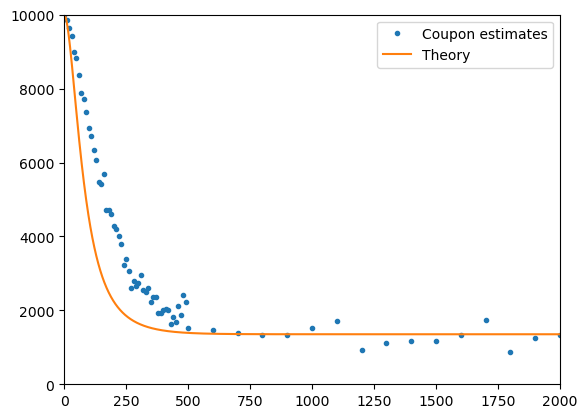

In [81]:
plt.plot(xs[:-1], estimates, '.', label="Coupon estimates")
plt.plot(t1, theory_Ne, label="Theory")
plt.xlim(0,2000)
plt.ylim(0, 10000)
plt.legend()

# Two point sampling scheme

In [24]:
target_path = "/rds/project/rds-8b3VcZwY7rY/projects/dated_selection/data/two_times_100_20230506/"

In [ ]:
all_n_lineages = curve_inference.read_all_n_lineages(target_path)

In [20]:
max_generations = 20000

xs = np.concatenate([
    np.arange(0, 500, 50), 
    np.arange(500, 2000, 100), 
    np.arange(2000, 10000, 500),
    np.arange(10000, 10500, 50), 
    np.arange(10500, 12000, 100), 
    np.arange(12000, max_generations, 1000),
])


In [21]:
estimates = curve_inference.infer_Ne(all_n_lineages, xs, n_jobs=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:   13.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   22.3s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   44.8s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  4.0min
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  5.6min
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  6.3min
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  7.0min
[Parallel(n_jobs=5)]: Done  73 out of  73 | elapsed: 12.9min finished


In [160]:
N = 1e4
s = 1e-2
Ud = s * 2

t1 = np.arange(0, max_generations)
t2 = np.arange(0, max_generations)

theory_Ne = effective_pop_size_pairwise(t1, t2, N, Ud, s)



(0.0, 10000.0)

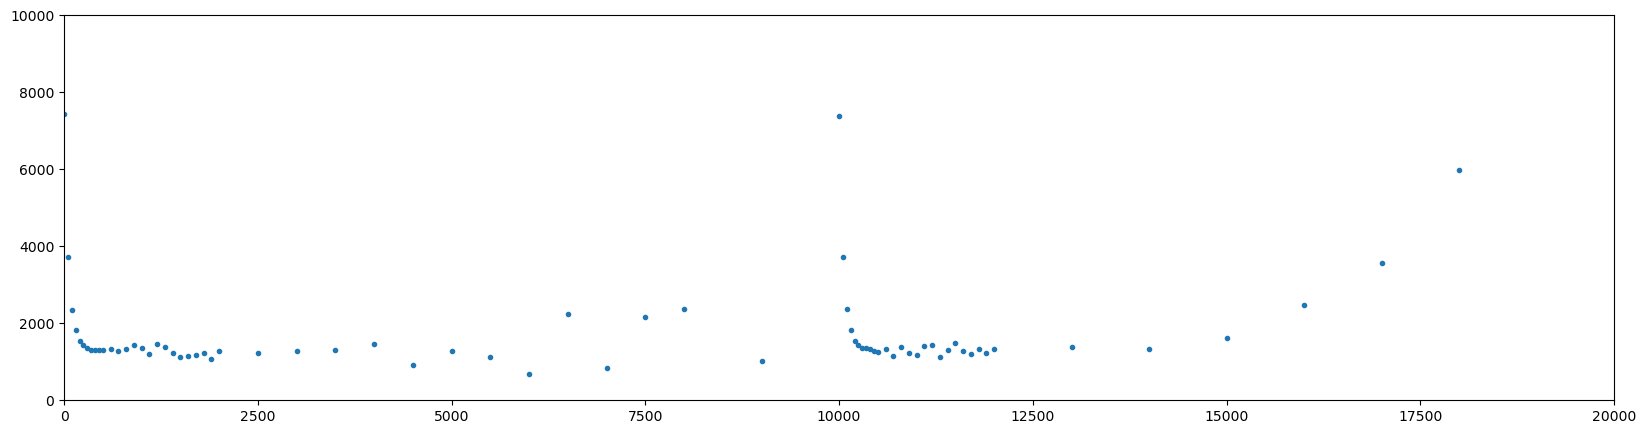

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(xs[:-1], estimates, '.')
#plt.plot(t1, theory_Ne)
plt.xlim(0,20000)
plt.ylim(0, 10000)

In [28]:
fine_estimates = curve_inference.infer_Ne(all_n_lineages, np.arange(10000,10050), n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 76 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  50 | elapsed:    6.7s remaining:   41.1s
[Parallel(n_jobs=-1)]: Done  13 out of  50 | elapsed:    6.7s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    6.7s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    7.2s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:    7.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    7.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    7.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 31.4min finished


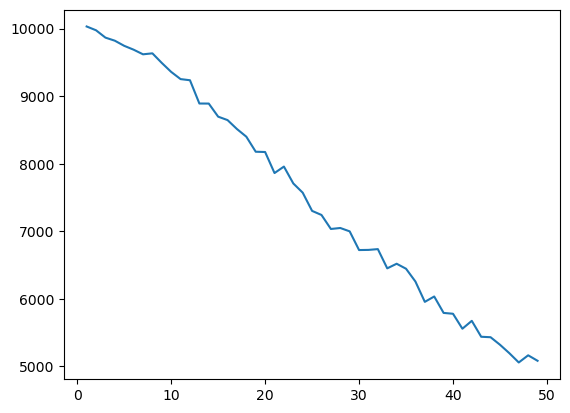

In [29]:
plt.plot(fine_estimates)

# Two point sampling scheme - earlier 

In [15]:
target_path = "/rds/project/rds-8b3VcZwY7rY/projects/dated_selection/data/two_times_earlier_20230623/"

In [16]:
all_n_lineages = curve_inference.read_all_n_lineages(target_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 76 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of 100 | elapsed:   22.1s remaining:  8.8min
[Parallel(n_jobs=-1)]: Done  15 out of 100 | elapsed:   23.8s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  26 out of 100 | elapsed:   26.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  37 out of 100 | elapsed:   30.2s remaining:   51.4s
[Parallel(n_jobs=-1)]: Done  48 out of 100 | elapsed:   32.3s remaining:   35.0s
[Parallel(n_jobs=-1)]: Done  59 out of 100 | elapsed:   32.9s remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  70 out of 100 | elapsed:   33.9s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  81 out of 100 | elapsed:   34.5s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  92 out of 100 | elapsed:   35.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.5s finished


In [34]:
max_generations = 20000

xs = np.concatenate([
    np.arange(0, 100, 5), 
    np.arange(100, 200, 5), 
    np.arange(200, 2000, 10), 
])


In [35]:
len(xs)

220

In [36]:
estimates = curve_inference.infer_Ne(all_n_lineages, xs, n_jobs=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0951s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done  92 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 114 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 140 tasks      | elapsed:    4.4s
[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 196 tasks      | elapsed:    6.4s
[Parallel(n_jobs=5)]: Done 210 out of 219 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=5)]: Done 219 out of 219 | elapsed:    7.2s finished


In [37]:
N = 1e4
s = 1e-2
Ud = s * 2

t1 = np.arange(0, max_generations)
t2 = np.arange(0, max_generations)

theory_Ne = effective_pop_size_pairwise(t1, t2, N, Ud, s)



(0.0, 10000.0)

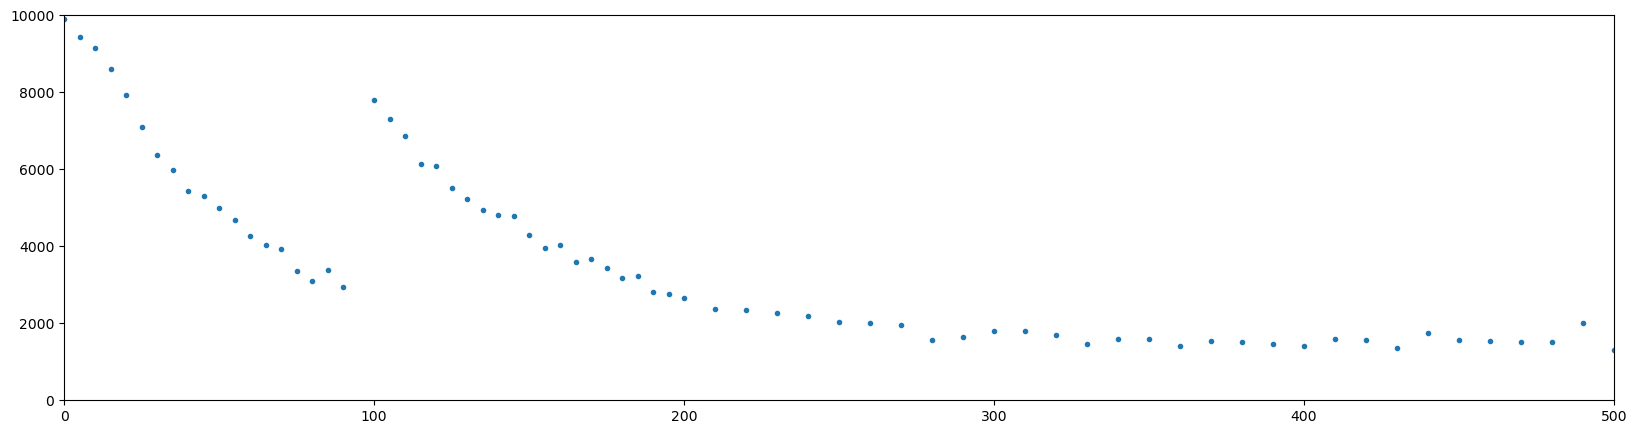

In [38]:
plt.figure(figsize=(20, 5))
plt.plot(xs[:-1], estimates, '.')
#plt.plot(t1, theory_Ne)
plt.xlim(0,500)
plt.ylim(0, 10000)

In [39]:
for x,y in zip(xs[:-1], estimates): print(x,y)

0 9905.61609236943
5 9428.300955041479
10 9153.034557791218
15 8591.952163049205
20 7941.489017333338
25 7099.908353056399
30 6364.2746306943045
35 5975.4133613870345
40 5435.932173445109
45 5297.100497581731
50 4995.127875453717
55 4682.609818885737
60 4275.481803500735
65 4035.6928303850164
70 3940.860915305043
75 3346.52353356774
80 3090.6395440445813
85 3386.10004603031
90 2953.005073046241
95 nan
100 7794.295187473304
105 7297.561721422276
110 6876.84475572243
115 6131.087504106996
120 6094.317176516433
125 5510.1571203484145
130 5229.912930720626
135 4952.311377487476
140 4821.382579991041
145 4791.790229516277
150 4305.600514801692
155 3955.0575810584355
160 4044.90634468435
165 3597.493566845302
170 3658.9151575812016
175 3423.6209284548845
180 3174.0730961588074
185 3225.3901427953706
190 2823.2648915216328
195 2762.1218207779416
200 2658.2939756081796
210 2376.1937497701474
220 2343.2396373970932
230 2267.8428836516696
240 2191.8532492338154
250 2041.7267863831757
260 1996.69

# Run manually on Bianca's trees

In [4]:
out1_str = open("/rds/project/rds-8b3VcZwY7rY/projects/dated_selection/data/from_bianca_20230623/out1.newick").read()
out10_str = open("/rds/project/rds-8b3VcZwY7rY/projects/dated_selection/data/from_bianca_20230623/out10.newick").read()

In [5]:
import tsconvert

In [7]:
out1_ts = tsconvert.from_newick(out1_str)
out10_ts = tsconvert.from_newick(out10_str)

In [33]:
out1_n_lineages = extract_tree_stats.get_lineages(out1_ts, 4000, [0, 1000], [100, 100])
out10_n_lineages = extract_tree_stats.get_lineages(out10_ts, 4000, [0, 100], [100, 100])

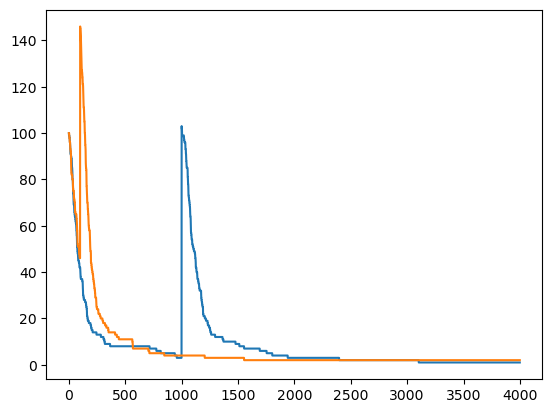

In [34]:
plt.plot(out1_n_lineages);
plt.plot(out10_n_lineages);

In [49]:
max_generations = 4000

xs = np.concatenate([
    np.arange(0, 200, 10), 
    np.arange(200, 1000, 50), 
    np.arange(1000, 1200, 10), 
    np.arange(1200, max_generations, 50), 
])


In [50]:
estimates = curve_inference.infer_Ne(out1_n_lineages[np.newaxis,:], xs, n_jobs=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0062s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0090s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0123s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  66 out of 111 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  78 out of 111 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 111 out of 111 | elapsed:    0.1s finished


(0.0, 10000.0)

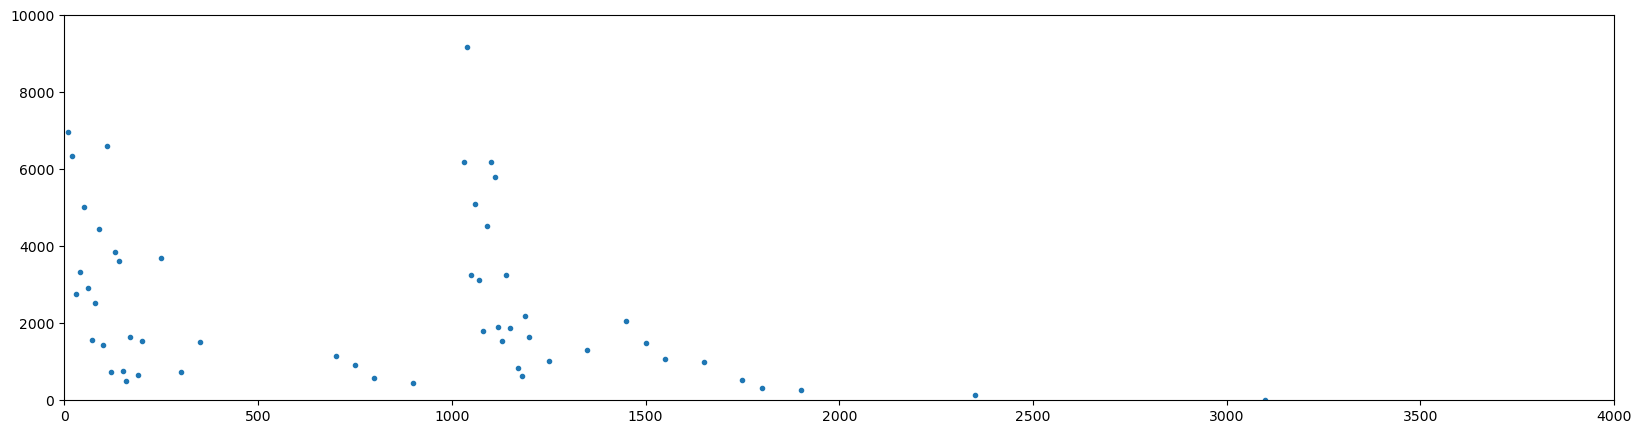

In [51]:
plt.figure(figsize=(20, 5))
plt.plot(xs[:-1], estimates, '.')
#plt.plot(t1, theory_Ne)
plt.xlim(-1, max_generations)
plt.ylim(0, 10000)

In [47]:
estimates[:10]

array([4916.78084756,           nan,           nan,           nan,
       4818.12612789,           nan,           nan, 4720.44487405,
       4623.78574723,           nan])

In [45]:
np.lib.stride_tricks.sliding_window_view(np.arange(10), window_shape=(3,))

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])